## Model 활용하기

### data 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data.csv', encoding='utf-8')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### null 값 제거

In [4]:
df['ID'] = df.index

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
ID               0
dtype: int64

In [6]:
df_age_mean = df['age'].mean()
df['age'].fillna(df_age_mean,inplace=True)

df_embarked_mode = df['embarked'].mode().values[0]
df['embarked'].fillna(df_embarked_mode, inplace=True)

df_embark_town_mode = df['embark_town'].mode().values[0]
df['embark_town'].fillna(df_embark_town_mode, inplace= True)

df.drop(columns='deck', inplace=True)

### train test valid 나누기

In [62]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,  random_state=42)
valid = pd.DataFrame()

In [63]:
valid[['ID', 'survived']] = test[['ID','survived']]

In [9]:
test.drop(columns='survived', inplace=True)
test.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,ID
709,3,male,29.699118,1,1,15.2458,C,Third,man,True,Cherbourg,yes,False,709
439,2,male,31.000000,0,0,10.5000,S,Second,man,True,Southampton,no,True,439
840,3,male,20.000000,0,0,7.9250,S,Third,man,True,Southampton,no,True,840


### 스케일링

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 298 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     668 non-null    int64  
 1   pclass       668 non-null    int64  
 2   sex          668 non-null    object 
 3   age          668 non-null    float64
 4   sibsp        668 non-null    int64  
 5   parch        668 non-null    int64  
 6   fare         668 non-null    float64
 7   embarked     668 non-null    object 
 8   class        668 non-null    object 
 9   who          668 non-null    object 
 10  adult_male   668 non-null    bool   
 11  embark_town  668 non-null    object 
 12  alive        668 non-null    object 
 13  alone        668 non-null    bool   
 14  ID           668 non-null    int64  
dtypes: bool(2), float64(2), int64(5), object(6)
memory usage: 74.4+ KB


In [11]:
train_id = train['ID']
test_id = test['ID']

In [12]:
scaling_cols = ['age', 'fare']

train_scaling = train[scaling_cols]
test_scaling = test[scaling_cols]

In [13]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(train_scaling)

StandardScaler()

In [14]:
train_scaled = pd.DataFrame(std.transform(train_scaling), columns=scaling_cols)
test_scaled = pd.DataFrame(std.transform(test_scaling), columns=scaling_cols)

In [15]:
train_scaled.shape, test_scaled.shape

((668, 2), (223, 2))

In [16]:
train_scaled['ID'] = train.index
test_scaled['ID'] = test.index

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [18]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'ID'],
      dtype='object')

In [19]:
train = train[['ID', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked','survived']]
test = test[['ID','pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

In [20]:
train['sex'] = label_encoder.fit_transform(train['sex'])
train['embarked'] = label_encoder.fit_transform(train['embarked'])
train['pclass'] = label_encoder.fit_transform(train['pclass'])

test['sex'] = label_encoder.fit_transform(test['sex'])
test['embarked'] = label_encoder.fit_transform(test['embarked'])
test['pclass'] = label_encoder.fit_transform(test['pclass'])

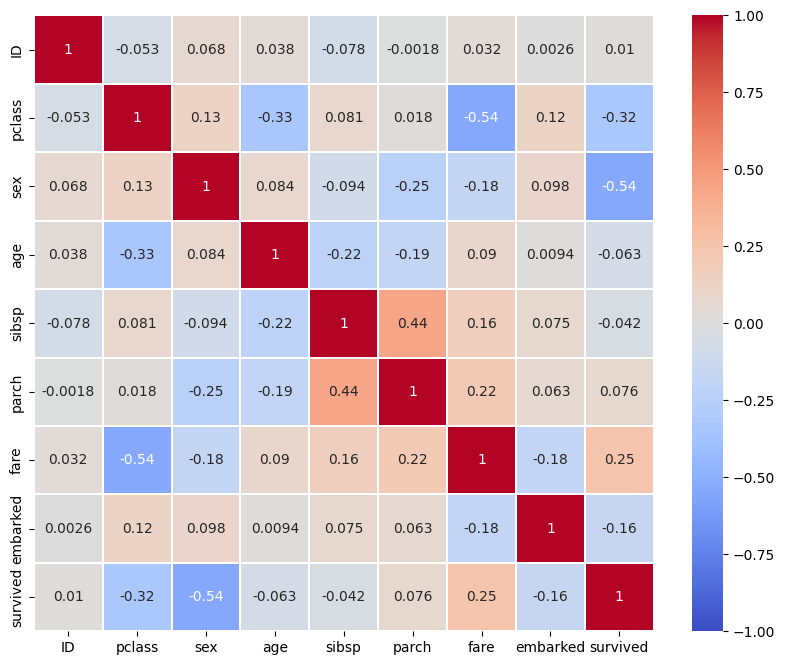

In [21]:
# 히트맵 생성 코드
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='coolwarm')

In [22]:
train_id

298    298
884    884
247    247
478    478
305    305
      ... 
106    106
270    270
860    860
435    435
102    102
Name: ID, Length: 668, dtype: int64

In [23]:
train_scaled

,age,fare,ID
0,0.017145,-0.032568,298
1,-0.344320,-0.487331,884
2,-0.421242,-0.342854,247
3,-0.575085,-0.478201,478
4,-2.196596,2.314937,305
...,...,...,...
663,-0.652007,-0.475695,106
664,0.017145,-0.022872,270
665,0.886429,-0.350450,860
666,-1.190459,1.703093,435


In [24]:
train_scaled.shape

(668, 3)

In [25]:
df.shape

(891, 15)

In [30]:
train.drop(columns=['age'], inplace=True)
train.drop(columns=['fare'], inplace=True)

test.drop(columns=['age'], inplace=True)
test.drop(columns=['fare'], inplace=True)

In [31]:
train.drop(columns=['ID'], inplace=True)
train_scaled.index = train.index
train = pd.concat([train, train_scaled], axis=1)


test.drop(columns=['ID'], inplace=True)
test_scaled.index = test.index
test = pd.concat([test, test_scaled], axis=1)

In [32]:
train.head(3)

,pclass,sex,sibsp,parch,embarked,survived,age,fare,ID
298,0,1,0,0,2,1,0.017145,-0.032568,298
884,2,1,0,0,2,0,-0.344320,-0.487331,884
247,1,0,0,2,2,1,-0.421242,-0.342854,247


In [33]:
train.shape

(668, 9)

### 모델 적용

In [34]:
from sklearn.model_selection import StratifiedKFold

In [35]:
# 교차 검증
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=0)

In [37]:
train.columns

Index(['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'survived', 'age',
       'fare', 'ID'],
      dtype='object')

In [40]:
train_features = train.drop(columns='survived')
train_target = train['survived']

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, mean_squared_error, accuracy_score, f1_score

In [47]:
hp = {
    "random_state": 42,
    "verbose": 0  # 부스팅 단계 출력 안보이게 하기
}
model = RandomForestRegressor(**hp)  # RandomForestRegressor로 모델 변경
n_iter = 0
auc_lst = []

for train_index, valid_index in skf.split(train_features, train_target):
    n_iter += 1
    # 학습용, 검증용 데이터 구성
    train_x, valid_x = train_features.iloc[train_index], train_features.iloc[valid_index]
    train_y, valid_y = train_target.iloc[train_index], train_target.iloc[valid_index]

    # 학습
    model.fit(train_x, train_y)
    valid_pred = model.predict(valid_x)  # 예측값

    # 평가
    fpr, tpr, thresholds = roc_curve(valid_y, valid_pred)
    valid_auc = auc(fpr, tpr)
    auc_lst.append(valid_auc)
    print(f'{n_iter} 번째 Stratified Stratified K-Fold 정확도: {valid_auc}')

# 최종 평가
print('-'*50)
print(f'교차 검증 auc: {np.mean(auc_lst)}')

1 번째 Stratified Stratified K-Fold 정확도: 0.8808560835861139
2 번째 Stratified Stratified K-Fold 정확도: 0.8760204081632652
3 번째 Stratified Stratified K-Fold 정확도: 0.8476535541752933
4 번째 Stratified Stratified K-Fold 정확도: 0.7736369910282954
5 번째 Stratified Stratified K-Fold 정확도: 0.8647342995169082
6 번째 Stratified Stratified K-Fold 정확도: 0.849551414768806
--------------------------------------------------
교차 검증 auc: 0.8487421252064471


In [50]:
pred = model.predict(train_x)

In [55]:
model

RandomForestRegressor(random_state=42)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# MAE 계산
mae = mean_absolute_error(train_y, pred)

# MSE 계산
mse = mean_squared_error(train_y, pred)

In [53]:
mse

0.02038402154398564

In [54]:
f1_score(train_y, pred, average="micro")

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [60]:
pred = model.predict(train_features) # 예측값

In [59]:
target_pred = model.predict(test)
test.shape, target_pred.shape

((223, 8), (223,))

In [64]:
valid['pred_survived'] = target_pred
valid.head()

,ID,survived,pred_survived
709,709,1,0.19
439,439,0,0.32
840,840,0,0.37
720,720,1,0.99
39,39,1,0.33
